In [4]:
import Pkg
Pkg.add("Images")
Pkg.add("FileIO")
Pkg.add("Plots")

using Images
using FileIO
using Plots

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


Write a Julia function ranktransform(img, kernel; epsilon=0.1) that implements
the rank transform. It should take a grayscale input image img and compute the
rank value of each pixel by comparing it to the neighboring locations selected by the
boolean array kernel. The value epsilon serves as a tolerance threshold, i.e., instead
of testing whether the central pixel is larger than its neighbors, the function should
test whether the central pixel value is larger by a margin of at least epsilon.

In [86]:
# Write a Julia function ranktransform(img, kernel; epsilon=0.1) that implements
#   the rank transform. It should take a grayscale input image img and compute the
#   rank value of each pixel by comparing it to the neighboring locations selected by the
#   boolean array kernel. The value epsilon serves as a tolerance threshold, i.e., instead
#   of testing whether the central pixel is larger than its neighbors, the function should
#   test whether the central pixel value is larger by a margin of at least epsilon.

# kernel example
# kernel = [true false true false false false true false]

function ranktransform(img, kernel; epsilon=0.1)
    # your code here

    # create a new image with the same size as the input image
    img_new = zeros(size(img))

    # size of kernel always 8

    # loop over all pixels in the image
    for i in 2:size(img,1) -1 
        for j in 2:size(img,2) -1

            # get the value of the central pixel
            central_pixel = img[i,j]

            # get the values of the neighboring pixels

            # get the value of the top left pixel
            top_left_pixel = img[i-1,j-1]

            # get the value of the top pixel
            top_pixel = img[i-1,j]

            # get the value of the top right pixel
            top_right_pixel = img[i-1,j+1]

            # get the value of the left pixel
            left_pixel = img[i,j-1]

            # get the value of the right pixel
            right_pixel = img[i,j+1]

            # get the value of the bottom left pixel
            bottom_left_pixel = img[i+1,j-1]

            # get the value of the bottom pixel
            bottom_pixel = img[i+1,j]

            # get the value of the bottom right pixel
            bottom_right_pixel = img[i+1,j+1]

            # get the values of the neighboring pixels into an array
            neighboring_pixels = [top_left_pixel top_pixel top_right_pixel left_pixel right_pixel bottom_left_pixel bottom_pixel bottom_right_pixel]

            # get the number of neighboring pixels that are smaller than the central pixel + epsilon
            number_of_larger_pixels = sum(neighboring_pixels .< (central_pixel - N0f8.(epsilon)))

            # put the rank value into the new image
            img_new[i,j] = number_of_larger_pixels
        end
    end

    # convert array to image
    img_new = Gray.(img_new)
    return img_new
end

ranktransform (generic function with 1 method)

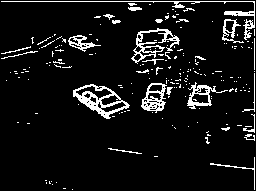

In [91]:
img = load("images/hamburg01.png")

# Convert img to grayscale
img = Gray.(img)

# Create a boolean kernel
kernel = [true false true false false false true false]

# Compute the rank transform of img
img_rank = ranktransform(img, kernel)

# Display the input image and the rank transform image
img_rank